In [35]:
import pandas as pd

In [36]:
df = pd.read_csv('merged_data.csv')
df = df.drop(['Unnamed: 0'], axis = 1)
df = df.drop(['Unnamed: 0.1'], axis = 1)
df.head()

,Game_date,Games_played_to_date,BA,PA,Name,ISO,SLG,BABIP,BIP,OBP,...,strike_percentage,pitches_per_appearance_avg,ground_ball_percentage,fly_ball_percentage,strikeout_percentage,next_game_team1,next_game_team2,hitter_R%,hitter_L%,next_game_hit_vs_fp
0,2014-03-31,1,0.00000,4,Travis d'Arnaud,0.0,0.00000,0.00000,0.33333,0.25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0
1,2014-03-31,1,0.20000,5,Jayson Werth,0.0,0.20000,0.33333,0.60000,0.20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,1
2,2014-03-31,1,0.25000,5,Ian Desmond,0.0,0.25000,0.25000,1.00000,0.20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,1
3,2014-03-31,1,0.25000,5,Bryce Harper,0.0,0.25000,0.50000,0.50000,0.40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0
4,2014-03-31,1,0.33333,5,Adam LaRoche,1.0,1.33333,0.00000,1.00000,0.60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,1


In [37]:
col = []
for i in df.columns:
    if str(type(df.at[df[i].first_valid_index(), i])) == "<class 'numpy.int64'>" or str(type(df.at[df[i].first_valid_index(), i])) == "<class 'numpy.float64'>" or isinstance(df.at[df[i].first_valid_index(), i], int) or isinstance(df.at[df[i].first_valid_index(), i], float):
        col.append(i)
col

['Games_played_to_date',
 'BA',
 'PA',
 'ISO',
 'SLG',
 'BABIP',
 'BIP',
 'OBP',
 'OPS',
 'LA_avg',
 'LA_median',
 'Walks',
 'next_game_HIT',
 'H_total_next_game',
 'AB_next_game',
 'Walks_next_game',
 'AB_vs_first_pitcher',
 'earliest_inning',
 'first_pitcher_faced_next_game_id',
 'hits_vs_first_pitcher',
 'BA_last_10_games',
 'BA_last_20_games',
 'BA_last_30_games',
 'BABIP_last_10_games',
 'BABIP_last_20_games',
 'BABIP_last_30_games',
 'BIP_last_10_games',
 'BIP_last_20_games',
 'BIP_last_30_games',
 'ISO_last_10_games',
 'ISO_last_20_games',
 'ISO_last_30_games',
 'LAmed_last_10_games',
 'LAmed_last_20_games',
 'LAmed_last_30_games',
 'OBP_last_10_games',
 'OBP_last_20_games',
 'OBP_last_30_games',
 'OPS_last_10_games',
 'OPS_last_20_games',
 'OPS_last_30_games',
 'PA_last_10_games',
 'PA_last_20_games',
 'PA_last_30_games',
 'SLG_last_10_games',
 'SLG_last_20_games',
 'SLG_last_30_games',
 'Walks_last_10_games',
 'Walks_last_20_games',
 'Walks_last_30_games',
 'mlbam_code',
 'Fla

In [38]:
len(col)

227

In [39]:
for i in df.columns:
    if not (str(type(df.at[df[i].first_valid_index(), i])) == "<class 'numpy.int64'>" or str(type(df.at[df[i].first_valid_index(), i])) == "<class 'numpy.float64'>" or isinstance(df.at[df[i].first_valid_index(), i], int) or isinstance(df.at[df[i].first_valid_index(), i], float)):
        print (i)

Game_date
Name
next_game_date
HomeTeam
AwayTeam
Date_x
Team 1
Team 2
Venue
Weather Type
Wind Direction
Year_x
PARK NAME
PARKID
LEAGUE
CITY
Foul
Pitcher_Name
Pitcher_ID
Date_y
Team
At
Opponent
Result
Innings
Decision
Entered
Exited
name_last
name_first
key_retro
key_bbref
next_game_team1
next_game_team2


In [40]:
train = df[col]
train = train.drop(['next_game_HIT'], axis = 1)
train = train.drop(['H_total_next_game'], axis = 1)
train = train.drop(['AB_next_game'], axis = 1)
train = train.drop(['Walks_next_game'], axis = 1)
train = train.drop(['next_game_hit_vs_fp'], axis = 1)
train = train.drop(['hits_vs_first_pitcher'], axis = 1)
train = train.drop(['Team 1 Score'], axis = 1)
train = train.drop(['Team 2 Score'], axis = 1)
train = train.drop(['Game_Score'], axis = 1)
train = train.drop(['Inherited_Score'], axis = 1)
train = train.drop(['key_fangraphs'], axis = 1)
train = train.drop(['first_pitcher_faced_next_game_id'], axis = 1)
test = df['next_game_HIT']
train.head()

,Games_played_to_date,BA,PA,ISO,SLG,BABIP,BIP,OBP,OPS,LA_avg,...,wip_season,whip_season,batters_faced_on_season,strike_percentage,pitches_per_appearance_avg,ground_ball_percentage,fly_ball_percentage,strikeout_percentage,hitter_R%,hitter_L%
0,1,0.00000,4,0.0,0.00000,0.00000,0.33333,0.25,0.25000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0
1,1,0.20000,5,0.0,0.20000,0.33333,0.60000,0.20,0.40000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0
2,1,0.25000,5,0.0,0.25000,0.25000,1.00000,0.20,0.45000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0
3,1,0.25000,5,0.0,0.25000,0.50000,0.50000,0.40,0.65000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0
4,1,0.33333,5,1.0,1.33333,0.00000,1.00000,0.60,1.93333,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0


In [41]:
train2 = train
train2 = train2 = train.join(pd.get_dummies(df['Weather Type'], prefix = 'Weather'))
train2 = train2.join(pd.get_dummies(df['Wind Direction'], prefix = 'Wind'))
train2.head()

,Games_played_to_date,BA,PA,ISO,SLG,BABIP,BIP,OBP,OPS,LA_avg,...,Wind_In From LF,Wind_In From RF,Wind_L To R,Wind_None,Wind_Out To CF,Wind_Out To LF,Wind_Out To RF,Wind_R To L,Wind_Varies,Wind_none
0,1,0.00000,4,0.0,0.00000,0.00000,0.33333,0.25,0.25000,NaN,...,0,0,0,0,0,1,0,0,0,0
1,1,0.20000,5,0.0,0.20000,0.33333,0.60000,0.20,0.40000,NaN,...,0,0,0,0,0,1,0,0,0,0
2,1,0.25000,5,0.0,0.25000,0.25000,1.00000,0.20,0.45000,NaN,...,0,0,0,0,0,1,0,0,0,0
3,1,0.25000,5,0.0,0.25000,0.50000,0.50000,0.40,0.65000,NaN,...,0,0,0,0,0,1,0,0,0,0
4,1,0.33333,5,1.0,1.33333,0.00000,1.00000,0.60,1.93333,NaN,...,0,0,0,0,0,1,0,0,0,0


In [42]:
train = train.join(pd.get_dummies(df['Weather Type'], prefix = 'Weather'))
train = train.join(pd.get_dummies(df['Wind Direction'], prefix = 'Wind'))
train = train.join(pd.get_dummies(df['PARKID'], prefix = 'Park'))
train = train.join(pd.get_dummies(df['Pitcher_ID'], prefix = 'Pitcher'))
train.head()

,Games_played_to_date,BA,PA,ISO,SLG,BABIP,BIP,OBP,OPS,LA_avg,...,Pitcher_yacabji01,Pitcher_yamamjo01,Pitcher_yarbrry01,Pitcher_ynoaga01,Pitcher_youngal01,Pitcher_youngch03,Pitcher_zastrro01,Pitcher_zeuchtj01,Pitcher_zimmejo02,Pitcher_zitoba01
0,1,0.00000,4,0.0,0.00000,0.00000,0.33333,0.25,0.25000,NaN,...,0,0,0,0,0,0,0,0,0,0
1,1,0.20000,5,0.0,0.20000,0.33333,0.60000,0.20,0.40000,NaN,...,0,0,0,0,0,0,0,0,0,0
2,1,0.25000,5,0.0,0.25000,0.25000,1.00000,0.20,0.45000,NaN,...,0,0,0,0,0,0,0,0,0,0
3,1,0.25000,5,0.0,0.25000,0.50000,0.50000,0.40,0.65000,NaN,...,0,0,0,0,0,0,0,0,0,0
4,1,0.33333,5,1.0,1.33333,0.00000,1.00000,0.60,1.93333,NaN,...,0,0,0,0,0,0,0,0,0,0


In [43]:
for i in train.columns:    
    if (train.shape[0] - train[i].count()) / train.shape[0] > .3:
        print (i)
        train = train.drop([i], axis = 1)

BA_last_30_games
BABIP_last_30_games
BIP_last_30_games
ISO_last_30_games
LAmed_last_20_games
LAmed_last_30_games
OBP_last_30_games
OPS_last_30_games
PA_last_30_games
SLG_last_30_games
Walks_last_30_games
EP_percentage_hits
FA_percentage_hits
FO_percentage_hits
FS_percentage_hits
KC_percentage_hits
KN_percentage_hits
SC_percentage_hits
pHitsByZone11
pHitsByZone12
pHitsByZone3
Inherited_Runners
hip_last_ten
wip_last_ten


In [44]:
for i in train.columns:
    if (len(train[i].unique()) > 2):
        train[i] = train[i].fillna(train[i].mode()[0])
    else:
        train[i] = train[i].fillna(train[i].median())

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

x, y = pd.DataFrame(train), pd.DataFrame(test)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

clf = RandomForestClassifier()
clf.fit(x_train, y_train.values.ravel())

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [46]:
predictions = clf.predict(x_test)
predictions = [float(i) for i in predictions]
comparison = pd.DataFrame({"Real" : y_test.iloc[:,0], "Predictions" : predictions})
comparison = comparison.reset_index()
comparison = comparison.drop(['index'], axis=1)
correct = 0
for i in range(len(comparison)):
    if comparison.at[i, 'Real'] == comparison.at[i, 'Predictions']:
        correct += 1
print (correct / len(comparison))

0.6476471807628524


In [47]:
false = comparison[comparison['Real'] != comparison['Predictions']]
false = false.reset_index()
false = false.drop(['index'], axis = 1)
falsePositive = 0
if len(false) == 0:
    print (falsePositive)
else:
    for i in range(len(false)):
        if false.at[i, 'Real'] == 0:
            falsePositive += 1
    print (falsePositive / len(false))

0.908810119135167


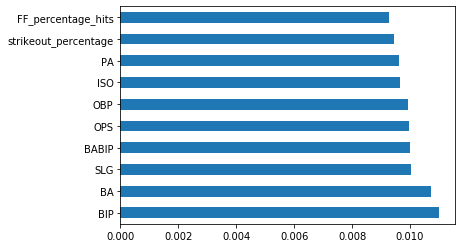

In [48]:
feat_importances = pd.Series(clf.feature_importances_, index=train.columns)
feat_importances.nlargest(10).plot(kind='barh')

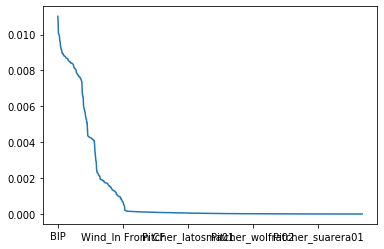

In [49]:
feat_importances.nlargest(len(feat_importances)).plot(kind='line')

In [50]:
for i in train2.columns:    
    if (train2.shape[0] - train2[i].count()) / train2.shape[0] > .3:
        print (i)
        train2 = train2.drop([i], axis = 1)

BA_last_30_games
BABIP_last_30_games
BIP_last_30_games
ISO_last_30_games
LAmed_last_20_games
LAmed_last_30_games
OBP_last_30_games
OPS_last_30_games
PA_last_30_games
SLG_last_30_games
Walks_last_30_games
EP_percentage_hits
FA_percentage_hits
FO_percentage_hits
FS_percentage_hits
KC_percentage_hits
KN_percentage_hits
SC_percentage_hits
pHitsByZone11
pHitsByZone12
pHitsByZone3
Inherited_Runners
hip_last_ten
wip_last_ten


In [51]:
for i in train2.columns:
    if (len(train2[i].unique()) > 2):
        train2[i] = train2[i].fillna(train2[i].mode()[0])
    else:
        train2[i] = train2[i].fillna(train2[i].median())

In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

x, y = pd.DataFrame(train2), pd.DataFrame(test)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

clf = RandomForestClassifier()
clf.fit(x_train, y_train.values.ravel())

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [53]:
predictions = clf.predict(x_test)
predictions = [float(i) for i in predictions]
comparison = pd.DataFrame({"Real" : y_test.iloc[:,0], "Predictions" : predictions})
comparison = comparison.reset_index()
comparison = comparison.drop(['index'], axis=1)
correct = 0
for i in range(len(comparison)):
    if comparison.at[i, 'Real'] == comparison.at[i, 'Predictions']:
        correct += 1
print (correct / len(comparison))

0.652337271973466


In [54]:
false = comparison[comparison['Real'] != comparison['Predictions']]
false = false.reset_index()
false = false.drop(['index'], axis = 1)
falsePositive = 0
if len(false) == 0:
    print (falsePositive)
else:
    for i in range(len(false)):
        if false.at[i, 'Real'] == 0:
            falsePositive += 1
    print (falsePositive / len(false))

0.9033315942461057


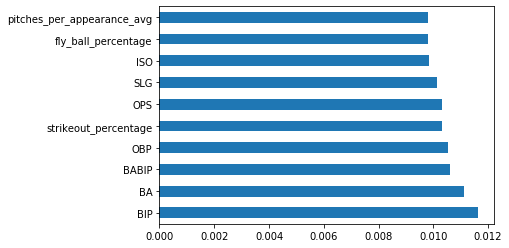

In [55]:
feat_importances = pd.Series(clf.feature_importances_, index=train2.columns)
feat_importances.nlargest(10).plot(kind='barh')

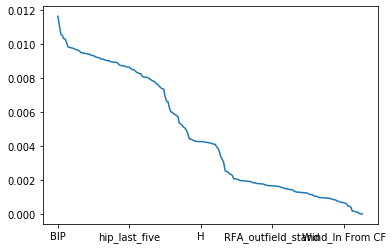

In [56]:
feat_importances.nlargest(len(feat_importances)).plot(kind='line')

In [57]:
len(train.columns)

936

In [58]:
len(train2.columns)

214

In [59]:
len(df.columns)

261

In [60]:
train2 = train2.join(df['Name'])
train2 = train2.join(df['next_game_HIT'])
names = df['Name'].unique().tolist()
temp = df['Name'].value_counts().to_frame()
temp = temp.reset_index()
temp.columns = ['Name', 'Count']
temp.head()

,Name,Count
0,Carlos Santana,830
1,Eric Hosmer,824
2,Anthony Rizzo,821
3,Paul Goldschmidt,807
4,Nolan Arenado,807


In [61]:
len(names)

1060

In [62]:
for i in range(len(temp)):
    if temp.at[i, 'Count'] < 30:
        names.remove(temp.at[i, 'Name'])

In [63]:
len(names)

760

In [64]:
colNames = ['Name', 'Samples', 'Accuracy', 'FalsePositive', 'F1', 'S1', 'F2', 'S2', 'F3', 'S3']
players = pd.DataFrame(columns = colNames)  

count = 0

for name in names:
    
    players.at[count, 'Name'] = name
    
    train3 = train2[train2['Name'] == name]
    train3 = train3.drop(['Name'], axis = 1)
    test3 = train3['next_game_HIT']
    train3 = train3.drop(['next_game_HIT'], axis = 1)
    
    players.at[count, 'Samples'] = train3.shape[0]
    
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.model_selection import train_test_split

    x, y = pd.DataFrame(train3), pd.DataFrame(test3)
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

    clf = RandomForestClassifier()
    clf.fit(x_train, y_train.values.ravel())
    
    predictions = clf.predict(x_test)
    predictions = [float(i) for i in predictions]
    comparison = pd.DataFrame({"Real" : y_test.iloc[:,0], "Predictions" : predictions})
    comparison = comparison.reset_index()
    comparison = comparison.drop(['index'], axis=1)
    correct = 0
    for i in range(len(comparison)):
        if comparison.at[i, 'Real'] == comparison.at[i, 'Predictions']:
            correct += 1
    players.at[count, 'Accuracy'] = correct / len(comparison)
    
    false = comparison[comparison['Real'] != comparison['Predictions']]
    false = false.reset_index()
    false = false.drop(['index'], axis = 1)
    falsePositive = 0
    if len(false) == 0:
        players.at[count, 'FalsePositive'] = falsePositive
    else:
        for i in range(len(false)):
            if false.at[i, 'Real'] == 0:
                falsePositive += 1
        players.at[count, 'FalsePositive'] = falsePositive / len(false)
                
    feat_importances = pd.Series(clf.feature_importances_, index=train3.columns)
    feat_importances = feat_importances.nlargest(len(feat_importances)).to_frame()
    feat_importances = feat_importances.reset_index()
    feat_importances.columns = ['F', 'S']
    players.at[count, 'F1'] = feat_importances.at[0, 'F']
    players.at[count, 'S1'] = feat_importances.at[0, 'S']           
    players.at[count, 'F2'] = feat_importances.at[1, 'F']
    players.at[count, 'S2'] = feat_importances.at[1, 'S']
    players.at[count, 'F3'] = feat_importances.at[2, 'F']
    players.at[count, 'S3'] = feat_importances.at[2, 'S']
               
    count += 1
               
players.head()

,Name,Samples,Accuracy,FalsePositive,F1,S1,F2,S2,F3,S3
0,Travis d'Arnaud,365,0.712329,0.619048,ground_ball_percentage,0.0193138,key_mlbam,0.017214,pitches_per_appearance_avg,0.0151537
1,Jayson Werth,376,0.618421,0.655172,pHitsByZone1,0.0219489,hip_last_three,0.0157996,FT_percentage_hits,0.0151954
2,Ian Desmond,649,0.584615,0.777778,Game_Number,0.0167674,wip_last_five,0.0147105,SLG,0.0134931
3,Bryce Harper,728,0.616438,0.821429,ground_ball_percentage,0.0155073,wip_season,0.014322,Game_Number,0.0138069
4,Adam LaRoche,198,0.575,0.588235,wip_last_five,0.020626,strike_percentage,0.0195457,wip_season,0.018754


In [65]:
players2 = players[['F1', 'F2', 'F3']]
players2 = players2.apply(pd.Series.value_counts).fillna(0).astype(int)
players2['Sum'] = players2['F1'] + players2['F2'] + players2['F3']
players2 = players2['Sum']
players2.nlargest(len(players2))

strikeout_percentage          96
strike_percentage             87
pitches_per_appearance_avg    86
ground_ball_percentage        82
fly_ball_percentage           74
                              ..
Days_Rest                      1
Double_Plays_Grounded_Into     1
Walks_last_20_games            1
HR_norm                        1
LCF_outfield_norm              1
Name: Sum, Length: 130, dtype: int32

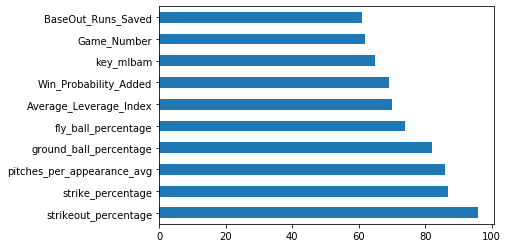

In [66]:
players2.nlargest(10).plot(kind='barh')

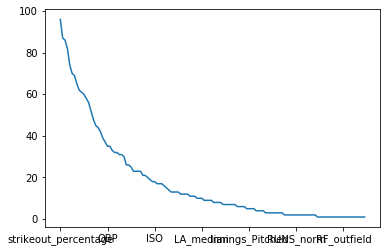

In [67]:
players2.nlargest(len(players2)).plot(kind='line')

In [68]:
players.sort_values(by='Accuracy', ascending=False)

,Name,Samples,Accuracy,FalsePositive,F1,S1,F2,S2,F3,S3
426,Luis Arraez,75,0.933333,1,Average_Leverage_Index,0.0323157,strikeout_percentage,0.0322291,BaseOut_Runs_Saved,0.0284755
406,Sam Travis,60,0.916667,1,mlb_played_first,0.0326164,SLG_last_10_games,0.0314078,OBP_last_10_games,0.0303613
743,Raul Ibanez,53,0.909091,1,Strikes_Swinging,0.0404535,Game_Number,0.0388197,SLG,0.0383457
561,Joey Butler,50,0.9,1,Under_lsa_p,0.0421013,BaseOut_Runs_Saved,0.0379512,whip_season,0.0351574
450,Bo Bichette,45,0.888889,1,BA_last_10_games,0.0378902,SLG_last_10_games,0.0239958,ISO_last_10_games,0.0237701
...,...,...,...,...,...,...,...,...,...,...
754,Josh Rojas,34,0.285714,0.2,Barrel_lsa_p,0.0229125,At_Bats,0.0209286,ISO_last_10_games,0.0209146
698,Jason Kubel,37,0.25,0.166667,batters_faced_on_season,0.0519652,PA,0.0416085,pHitsByZone2,0.0251931
278,Allen Cordoba,41,0.222222,0.714286,hip_last_three,0.0316623,LA_median,0.0277827,wip_last_five,0.0256918
109,Corey Hart,52,0.0909091,0.7,Hits_Allowed,0.0355656,At_Bats,0.031263,BIP_last_10_games,0.0274952
